# #FLIGHT PRICE PREDICTION-A Regression Analysis

# Objective:
        To predict flight prices given the various parameters.This will be a regression problem since the target or
        dependent variabe is the price(continuous numeric value).

# Introduction:
         Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly.

# Data Source:
          Data was used from Kaggle which is a freely available platform for data scientists and machine learning enthusiasts.

# Data Description
>Airline: Name of the airline used for traveling

>Date_of_Journey: Date at which a person traveled

>Source: Starting location of flight

>Destination: Ending location of flight

>Route: This contains information on starting and ending location of the journey in the standard format used by airlines.

>Dep_Time: Departure time of flight from starting location

>Arrival_Time: Arrival time of flight at destination

>Duration: Duration of flight in hours/minutes

>Total_Stops: Number of total stops flight took before landing at the destination.

>Additional_Info: Shown any additional information about a flight

>Price: Price of the flight

# Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Importing dataset

Since data is in form of excel file we have to use pandas read_excel to load the data

In [2]:
df=pd.DataFrame(pd.read_excel("Data-Train.xlsx"))

#to display all the columns:
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#Observation
1.we can analyze from the data that non-stop flights are less fare as compared to 1 or 2 stops flights.
2.season wise price is increasing which can be analysed from date of journey.

# Data Analysis
        The procedure of extracting information from given raw data is called data analysis. Here we will use eda 
module of data-prep library to do this steps.

In [4]:
#to get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [5]:
df["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [6]:
df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [5]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
df.shape

(10683, 11)

# Handling Missing Values

In [3]:
df.isnull().sum()/len(df)*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [ ]:
#observation
We can observe missing values in Route and Total_stops features which is less than 30%.So,there is no need of dropping the
entire column instead we can impute it.

<AxesSubplot:>

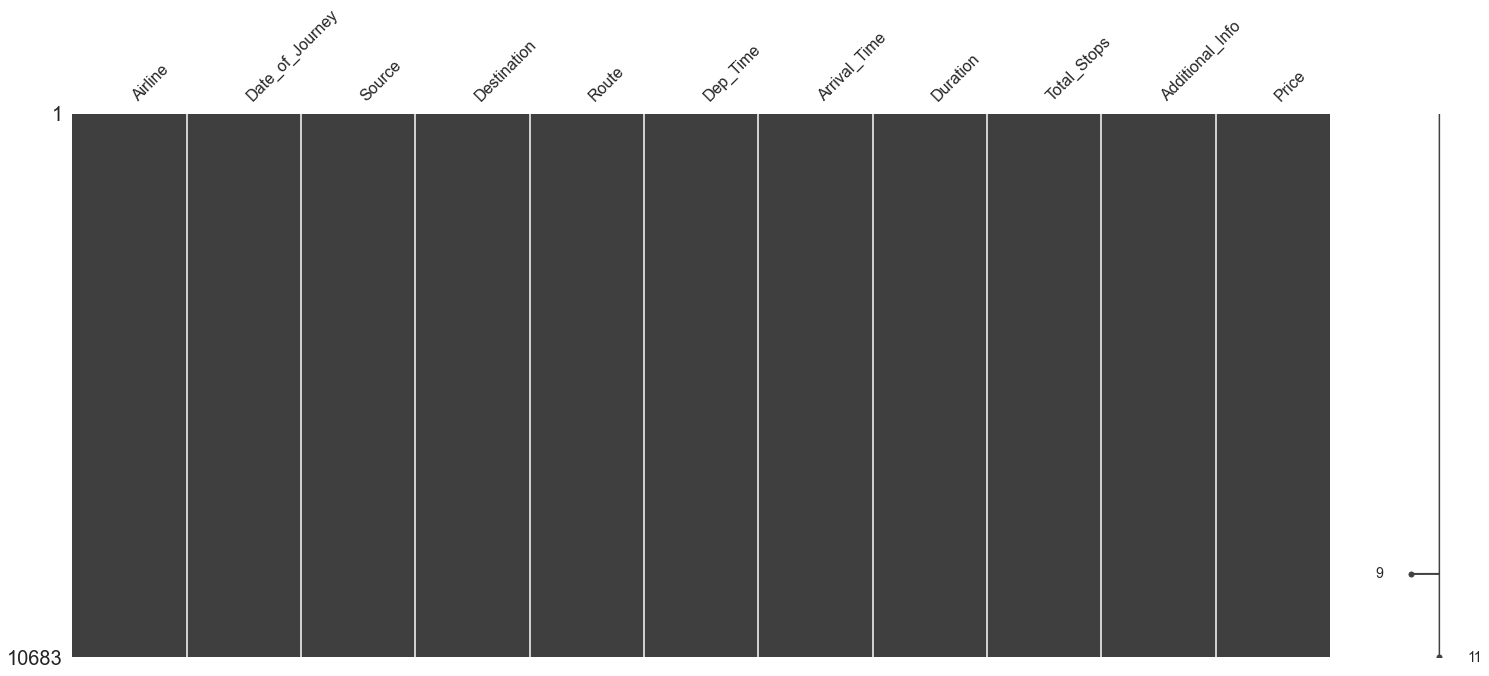

In [4]:
#visualisation of missing value
import missingno as msno
msno.matrix(df)

In [105]:
#Imputing missing values using simple imputer package
from sklearn.impute import SimpleImputer
sm_imp=SimpleImputer(strategy='most_frequent')
df[['Route','Total_Stops']]=sm_imp.fit_transform(df[['Route','Total_Stops']])

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.shape

(10683, 11)

In [ ]:
#observation
Number of Rows=10682
Number of Columns=11

# Statistical Description

In [11]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
#observation
1.Maximum price is 79512
2.Average price is 9087.2

In [118]:
df.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2377,233,423,550,5626,8345


In [ ]:
#observation
1.Here count shows total count of non null values of each categorical columns.
2.The unique shows the distinct values of each column.
3.The top indicates most frequent value in each column.
4.The frequency returns number of times the most frequent value appears in each column.

# EDA 
#TO INVESTIGATE THE DATA AND SUMMARIZE THE KEY INSIGHTS.

In [ ]:
##we came to understand that date of journey is an object datatype.so,first we have to convert it into datetime dtype.
.dt.day method will extract only day of that date
.dt.month method will extract only month of that date.

In [106]:
df["Journey_day"]=pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [107]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Journey_day      10683 non-null  int64 
 12  Journey_month    10683 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [108]:
# Since we have converted Date_of_Journey column into integers, Now we can drop it
df.drop("Date_of_Journey",axis=1,inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
#now we have to convert the dep_time to datetime dtype
# Similar to Date_of_Journey we can extract values from Dep_Time
.dt.hour method will extract only hour of that time

.dt.minute method will extract only minute of that time

In [109]:
df["Dep_hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

In [110]:
df["Dep_min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [111]:
# Now we can drop Dep_Time
df.drop("Dep_Time",axis=1,inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [112]:
#now we can convert arrival_time dataype same as dep_time
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute



In [24]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [113]:
#now drop the Arrival_Time column
df.drop("Arrival_Time", axis = 1, inplace = True)

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
#next one is Duration column which also has to be converted.Time shown in duration column is the time taken to travel to reach destination

In [114]:
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
#             print('Hour ',duration)
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
#             print('Minutes \n',duration)

In [115]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [116]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [117]:
df.drop(["Duration"], axis = 1, inplace = True)

In [212]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [118]:
##the route column is giving information as same as total_stops and Additional_Info contains almost 80% no_info
#so drop both columns

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [34]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


# plotting

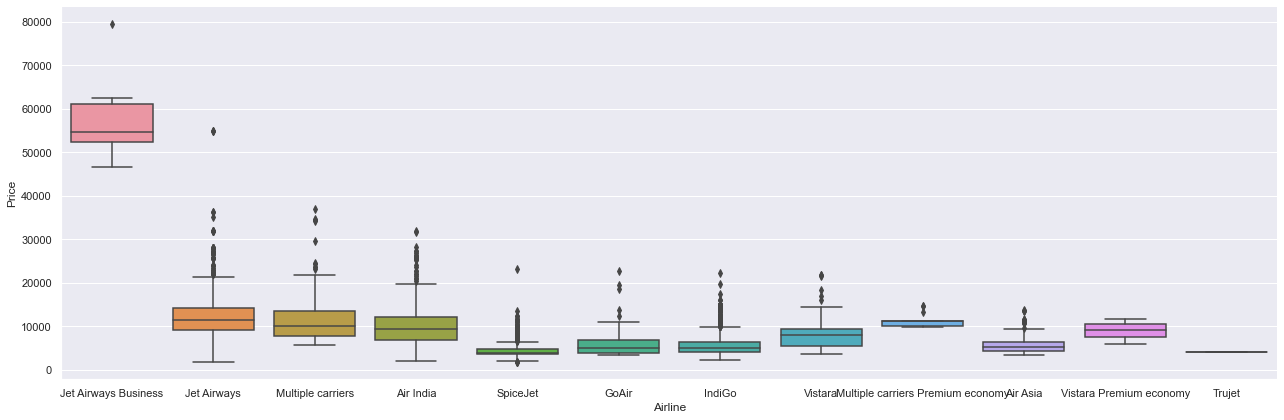

In [142]:
#plot of Airline vs price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

In [ ]:
#Observations
1.Jet Airways has high price as compared to other flights.
2.Remaining Airways have almost same prices. 
3.There are high outliers in jet Airways.


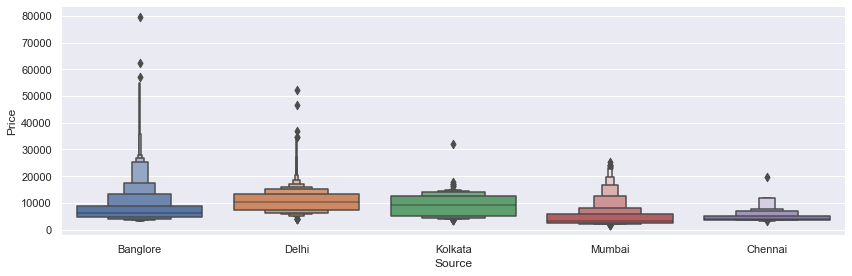

In [143]:
#plot of source vs price
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
#Observations
1.Chennai value in source column has less flight price as compared to rest of the values. 
2.Banglore shows a higher flight price.

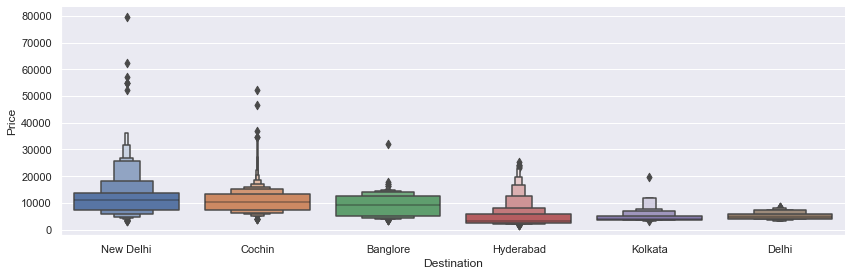

In [17]:
#plot of destination vs price
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
 #observation
Here we are plotting the box plot with the help of catplot between price of the flight and destination to which 
passenger is travelling to and figured out that New delhi has the most outliers and Kolkata has the least

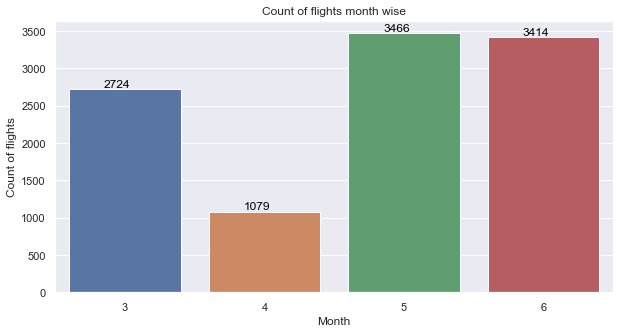

In [40]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [ ]:
#observation
Here in the above graph we have plotted the count plot for journey in month vs number of flights and got 
to see that May has the most number of flights.

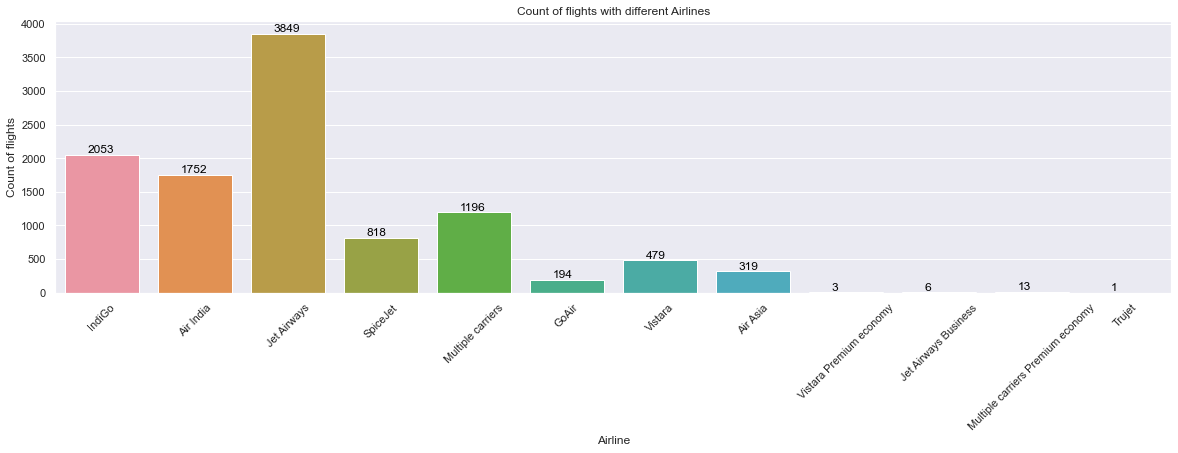

In [41]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [ ]:
#observation
From the above graph we can see that between the type of airlines and count of flights.
we can see that Jet airways has the most flight boarded.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

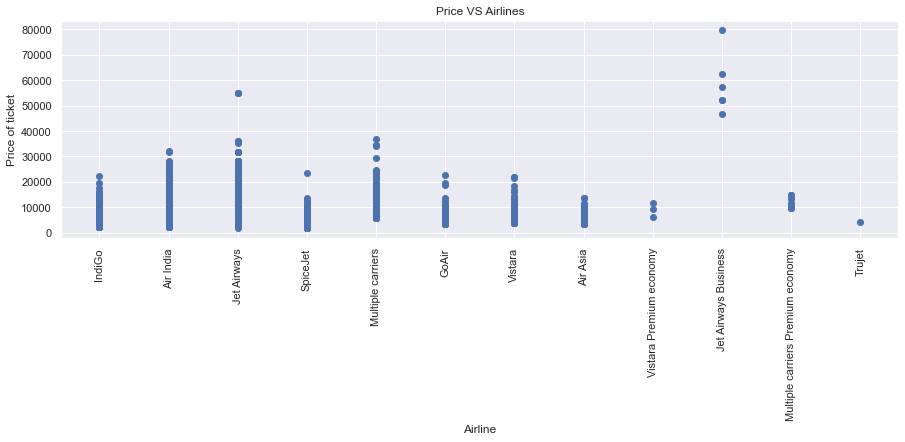

In [42]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'],df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [ ]:
#observation
Here we can observe that Jet Airways Business has highest ticket price and Trujet is having less price.

# Correlation between all features

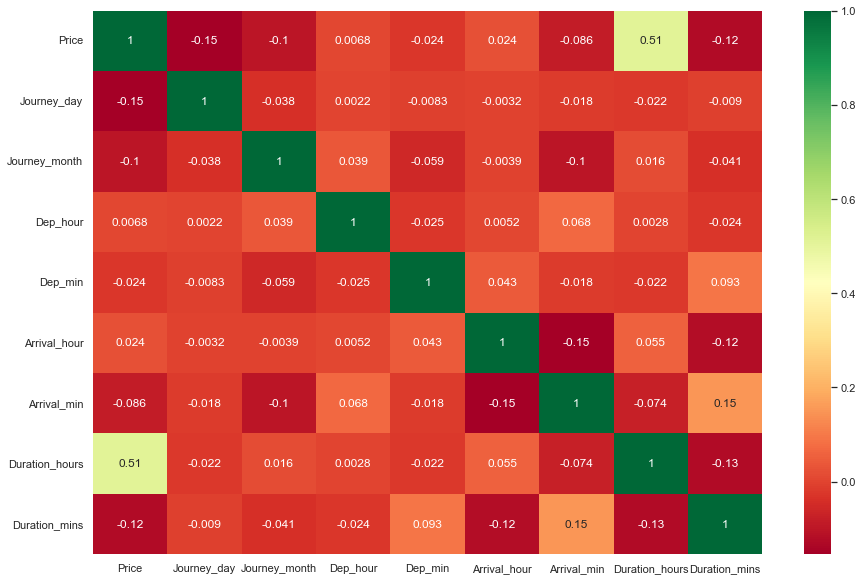

In [99]:
# Plotting Correation
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [119]:
df.drop(['Arrival_min'],axis=1,inplace=True)

# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case
Ordinal data --> data are in order --> LabelEncoder is used in this case
so here we have Airline,Source,Destination(nominal data) and Total stops(ordinal data) as categorical variables.

In [120]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [121]:
df=df[df['Airline']!='Trujet']

In [146]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [122]:
#OneHotEncoder
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True) #drop_first means get k - 1 dummies out of k categorical columns so, 11 columns are generated, Air_Asia is skipped alphabetically

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [123]:
#Next we have Source as nominal data to convert
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [124]:
#Next Destination
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
#Now we can change Total stops which is a ordinal data into a numeric data by using LabelEncoder
df["Total_Stops"].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [125]:
df["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,4,45


# concatenate dataframes : df, Airline,Source,Destination

In [126]:
df_one=pd.concat([df,Airline,Source,Destination],axis=1)
df_one.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
df_one.isnull().sum()

Airline                                      0
Source                                       0
Destination                                  0
Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Truje

In [154]:
df_one.shape

(10682, 32)

In [127]:
df_one.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [43]:
df_one.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
df_one.shape

(10683, 30)

# Feature Selection
     Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.We use lasso technique here for feature selection.

# Lasso()
     Lasso regression algorithm is defined as a regularization algorithm that assists in the elimination of irrelevant parameters, thus helping in the concentration of selection and regularizes the models.The LASSO method regularizes model parameters by shrinking the regression coefficients, reducing some of them to zero. The feature selection phase occurs after the shrinkage, where every non-zero value is selected to be used in the model.

In [128]:
#Create dependent and independent variables
x=df_one.loc[:,['Total_Stops', 'Journey_day', 'Journey_month',
       'Arrival_hour',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi','Duration_mins','Duration_hours','Dep_hour','Dep_min']]
y=df_one['Price']
#Here x is independent variables
#y is dependent variable

In [143]:
#Divide the variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape,x_test.shape

((8545, 27), (2137, 27))

In [144]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [145]:
lasso.fit(x_train,y_train)

Lasso()

In [146]:
lasso.coef_ #some of the coefficient become 0 in Lasso

array([ 2.69406370e+03, -7.66686395e+01, -4.10982083e+02, -1.31991332e+01,
        1.36995175e+03, -0.00000000e+00,  1.07091595e+01,  4.10788594e+03,
        5.00702572e+04,  3.42565749e+03,  2.89852239e+03, -4.90219854e+02,
        1.86439837e+03,  0.00000000e+00,  0.00000000e+00,  9.42105067e+01,
       -0.00000000e+00, -1.64764343e+03,  0.00000000e+00, -8.73149298e+02,
       -1.11058463e+02,  1.31805542e+01,  1.76698519e+03, -7.08044164e-01,
        6.28031658e+00,  2.08372104e+01, -2.62818020e+00])

In [147]:
las_pred=lasso.predict(x_test)
las_pred

array([11238.67261216,  7994.16127624,  6290.66617027, ...,
        7187.20545719, 11582.26306512,  2896.7895053 ])

In [214]:
lr2=lasso.score(x_train,y_train)
lr2

0.6333064347438035

In [215]:
las_adjR2=1-(((1-lr2)*(8545-1))/(8545-27-1))
las_adjR2

0.6321439683516564

In [150]:
las_df=pd.DataFrame({'Importance':list(lasso.coef_),'Columns':list(x)})
las_df

,Importance,Columns
0,2694.063705,Total_Stops
1,-76.668639,Journey_day
2,-410.982083,Journey_month
3,-13.199133,Arrival_hour
4,1369.951746,Airline_Air India
5,-0.000000,Airline_GoAir
6,10.709160,Airline_IndiGo
7,4107.885940,Airline_Jet Airways
8,50070.257209,Airline_Jet Airways Business
9,3425.657489,Airline_Multiple carriers


In [151]:
x.drop(['Airline_GoAir','Airline_Vistara Premium economy','Source_Chennai','Source_Kolkata','Destination_Cochin'],axis=1,inplace=True)

In [116]:
x

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_mins,Duration_hours,Dep_hour,Dep_min
0,0,24,3,1,10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,50,2,22,20
1,2,1,5,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,7,5,50
2,2,9,6,4,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,19,9,25
3,1,12,5,23,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,25,5,18,5
4,1,1,3,21,35,0,1,0,0,0,0,0,0,0,0,0,0,0,1,45,4,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,22,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,2,19,55
10679,0,27,4,23,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35,2,20,45
10680,0,27,4,11,20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3,8,20
10681,0,1,3,14,10,0,0,0,0,0,0,0,1,0,0,0,0,0,1,40,2,11,30


In [100]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':las_pred})

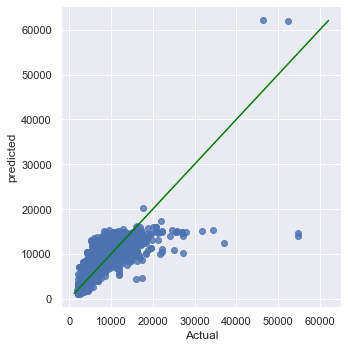

In [101]:
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

# Test Set

In [164]:
test_data=pd.DataFrame(pd.read_excel('Test-set (1).xlsx'))
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [137]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [26]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [27]:
#checking null values
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# EDA Test Data

In [165]:
#Date of Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [166]:
#Departure_Time
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [167]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [168]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: 
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]         

In [169]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [170]:
# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [41]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


# Converting Categorical data into Numeric data

In [171]:
#Airline column
Airline=test_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first= True)

In [172]:
#Source column
Source=test_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [173]:
#Destination column
Destination=test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination

In [174]:
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [175]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [41]:
data_test.head()

,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Drop columns Route, Additional_Info

In [176]:
##the route column is giving information as same as total_stops and Additional_Info contains almost 80% no_info
#so drop both columns

data_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [44]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1 stop,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1 stop,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1 stop,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1 stop,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,non-stop,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
#Now we can change Total stops which is a ordinal data into a numeric data by using LabelEncoder
data_test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [177]:
data_test["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [178]:
#As we dropped following columns fron train set due to correlation we remove them from test dataset.
data_test.drop(['Airline_GoAir','Airline_Vistara Premium economy','Source_Chennai','Source_Kolkata','Destination_Cochin'],axis=1,inplace=True)


In [138]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [179]:
data_test.drop('Arrival_min',axis=1,inplace=True)

In [180]:
data_test.shape

(2671, 22)

In [181]:
x.shape

(10682, 22)

In [ ]:
#ordering the column name of test dataset as train dataset

In [182]:
data_test=data_test[x.columns]

# Model Building

In [207]:
#Divide the variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape,x_test.shape

((8545, 22), (2137, 22))

In [208]:
#Lasso Regression
lasso.fit(x_train,y_train)

Lasso()

In [209]:
las_pred=lasso.predict(x_test)
las_pred

array([11238.67281305,  7994.16187774,  6290.6669745 , ...,
        7187.20700084, 11582.26328552,  2896.78970786])

In [212]:
lr2=lasso.score(x_train,y_train)
lr2

0.6333064347438035

In [213]:
las_adjR2=1-(((1-lr2)*(8545-1))/(8545-22-1))
las_adjR2

0.6323597956408188

In [216]:
las_MSE=metrics.mean_squared_error(las_pred,y_test)
las_MSE

9531019.226193076

In [217]:
las_MAE=metrics.mean_absolute_error(las_pred,y_test)
las_MAE

2061.030730661654

In [218]:
las_RMSE=np.sqrt(metrics.mean_squared_error(las_pred,y_test))
las_RMSE                

3087.234883547586

In [219]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':las_pred})

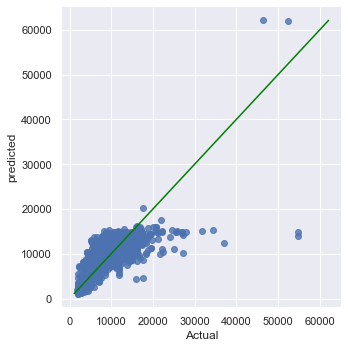

In [220]:
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

In [184]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [185]:
lin.intercept_

7475.371669526989

In [186]:
lin.coef_

array([ 2.68873698e+03, -7.65981053e+01, -4.08813023e+02, -1.34967232e+01,
        1.52061801e+03,  1.44881458e+02,  4.25059925e+03,  5.23387948e+04,
        3.57323527e+03,  3.89389889e+03, -3.78268334e+02,  2.02294140e+03,
        9.56635385e+01, -8.92891439e+02, -8.83177931e+02, -8.92891439e+02,
        3.60393232e+01,  1.76758861e+03, -4.86030977e-01,  5.49967302e+00,
        2.13404732e+01, -2.34619227e+00])

In [187]:
lin_pred=lin.predict(x_test)
lin_pred

array([11241.19541424,  7997.03196038,  6291.42122464, ...,
        7197.89815028, 11586.02447888,  2885.17746753])

In [188]:
lin_R2=lin.score(x_train,y_train)
lin_R2

0.6334957374415919

In [189]:
lin_adjR2=1-(((1-lin_R2)*(8545-1))/(8545-23-1))
lin_adjR2

0.6325064641123063

In [190]:
from sklearn import metrics

In [191]:
lin_MSE=metrics.mean_squared_error(lin_pred,y_test)
lin_MSE

9578996.38626686

In [192]:
lin_MAE=metrics.mean_absolute_error(lin_pred,y_test)
lin_MAE

2060.8647329065107

In [193]:
lin_RMSE=np.sqrt(metrics.mean_squared_error(lin_pred,y_test))
lin_RMSE                

3094.995377422535

In [194]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':lin_pred})

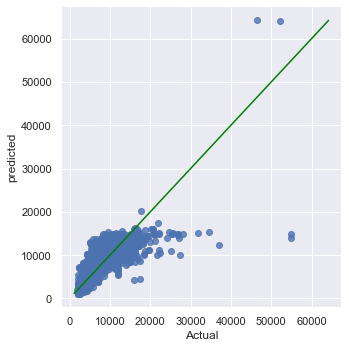

In [123]:
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

In [222]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [223]:
kn_pred=knn.predict(x_test)

In [224]:
kn_rsq=metrics.r2_score(kn_pred,y_test)
kn_rsq

0.21248582923227533

In [225]:
kn_R2=knn.score(x_train,y_train)
kn_R2

0.7355024503981531

In [226]:
kn_adjR2=1-(((1-kn_R2)*(8545-1))/(8545-23-1))
kn_adjR2

0.7347885149867175

In [227]:
kn_MSE=metrics.mean_squared_error(kn_pred,y_test)
kn_MSE

10617446.57267197

In [228]:
kn_MAE=metrics.mean_absolute_error(kn_pred,y_test)
kn_MAE

1904.4410856340664

In [229]:
kn_RMSE=np.sqrt(metrics.mean_squared_error(kn_pred,y_test))
kn_RMSE                

3258.442353743882

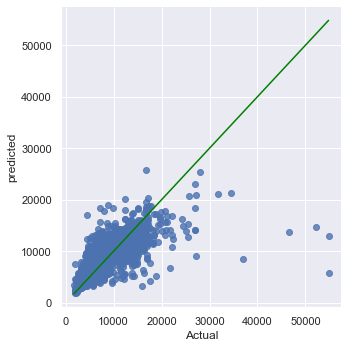

In [102]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':kn_pred})
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

In [230]:
#Decisiontree Regressor
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)

DecisionTreeRegressor()

In [231]:
dc_pred=dc.predict(x_test)

In [232]:
dc_rsq=metrics.r2_score(dc_pred,y_test)
dc_rsq

0.7030185846147963

In [233]:
dc_R2=dc.score(x_train,y_train)
dc_R2

0.9707511617601842

In [234]:
dc_adjR2=1-(((1-dc_R2)*(8545-1))/(8545-23-1))
dc_adjR2

0.9706722128950843

In [235]:
dc_MSE=metrics.mean_squared_error(dc_pred,y_test)
dc_MSE

6615419.698423414

In [236]:
dc_MAE=metrics.mean_absolute_error(dc_pred,y_test)
dc_MAE

1429.3729449383873

In [237]:
dc_RMSE=np.sqrt(metrics.mean_squared_error(dc_pred,y_test))
dc_RMSE                

2572.045819658626

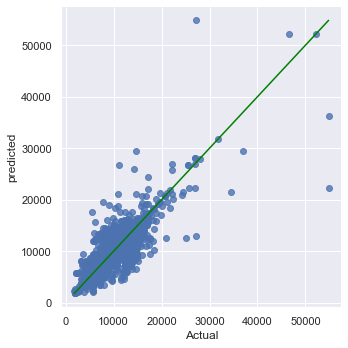

In [103]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':dc_pred})
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

In [ ]:
#RandomForest Regressor

In [238]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [239]:
#Prediction on x_test and store it on y_pred
rf_pred=rf.predict(x_test)


In [240]:
rf_rsq=metrics.r2_score(rf_pred, y_test)
rf_rsq

0.7748594004314617

In [241]:
rf_R2=rf.score(x_train,y_train)
rf_R2

0.9546443362365287

In [242]:
rf_adjR2=1-(((1-rf_R2)*(8545-1))/(8545-23-1))
rf_adjR2

0.9545219116071941

In [243]:
rf_MSE=metrics.mean_squared_error(rf_pred,y_test)
rf_MSE

4353455.989626667

In [244]:
rf_MAE=metrics.mean_absolute_error(rf_pred,y_test)
rf_MAE

1247.5950734919554

In [245]:
rf_RMSE=np.sqrt(metrics.mean_squared_error(rf_pred,y_test))
rf_RMSE                

2086.4937070661554

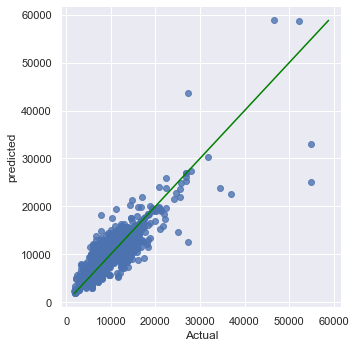

In [104]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':rf_pred})
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

In [246]:
#GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)


GradientBoostingRegressor()

In [247]:
gb_pred=gb.predict(x_test)

In [248]:
gb_rsq=metrics.r2_score(gb_pred, y_test)
gb_rsq

0.5889386995314061

In [249]:
gb_R2=gb.score(x_train,y_train)
gb_R2

0.7899617939985275

In [250]:
gb_adjR2=1-(((1-gb_R2)*(8545-1))/(8545-23-1))
gb_adjR2

0.7893948559938293

In [251]:
gb_MSE=metrics.mean_squared_error(gb_pred,y_test)
gb_MSE

6011419.374576765

In [252]:
gb_MAE=metrics.mean_absolute_error(gb_pred,y_test)
gb_MAE

1605.5329735236123

In [253]:
gb_RMSE=np.sqrt(metrics.mean_squared_error(gb_pred,y_test))
gb_RMSE                

2451.8196048194013

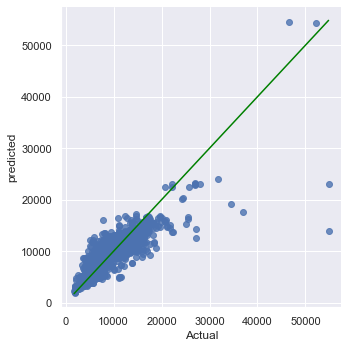

In [105]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':gb_pred})
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

In [ ]:
#observation
1. R-squared shows how well the data fit the regression model (the goodness of fit).
2. MSE shows the average squared difference between the estimated values and true value.
3. MAE shows  the mean of absolute difference between model prediction and target value.
4. RMSE shows the error rate by the square root of MSE.   

In [ ]:
#XGBRegressor

In [254]:
from xgboost import XGBRegressor
xgb_reg =  XGBRegressor()
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [255]:
xg_pred =  xgb_reg.predict(x_test)
xg_pred

array([12570.336 ,  4804.953 ,  6000.3   , ...,  6467.159 , 11989.906 ,
        3864.6482], dtype=float32)

In [256]:
print('Training Score :',xgb_reg.score(x_train, y_train))
print('Test Score     :',xgb_reg.score(x_test, y_test))

Training Score : 0.9322455176018273
Test Score     : 0.8418978758291573


In [257]:
xg_R2=xgb_reg.score(x_train,y_train)
xg_R2

0.9322455176018273

In [258]:
xg_adjR2=1-(((1-xg_R2)*(8545-1))/(8545-23-1))
xg_adjR2

0.9320626337742064

In [259]:
xg_rsq=metrics.r2_score(xg_pred, y_test)
xg_rsq

0.8023602870025045

In [260]:
xg_MSE=metrics.mean_squared_error(xg_pred,y_test)
xg_MSE

3627590.741367472

In [261]:
xg_MAE=metrics.mean_absolute_error(xg_pred,y_test)
xg_MAE

1210.8791357673213

In [262]:
xg_RMSE=np.sqrt(metrics.mean_squared_error(xg_pred,y_test))
xg_RMSE                

1904.6235169627282

In [263]:
plot_data=pd.DataFrame({'Actual':y_test,'predicted':xg_pred})

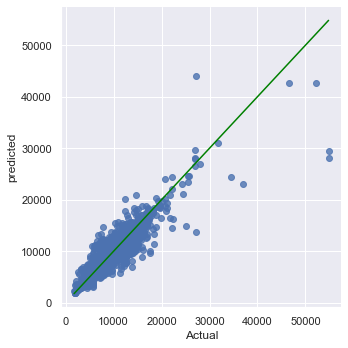

In [192]:
sns.lmplot(x='Actual',y='predicted',data=plot_data,fit_reg=False)
d_line=np.arange(plot_data.min().min(),plot_data.max().max())
plt.plot(d_line,d_line,color='green',linestyle='-')
plt.show()

In [264]:
list1=['LassoRegression','LinearRegression','KNN','DecisionTree','RandomForest','GB','XGB']
list2=[lr2,lin_R2,kn_R2,dc_R2,rf_R2,gb_R2,xg_R2]
list3=[las_adjR2,lin_adjR2,kn_adjR2,dc_adjR2,rf_adjR2,gb_adjR2,xg_adjR2]
list4=[las_MSE,lin_MSE,kn_MSE,dc_MSE,rf_MSE,gb_MSE,xg_MSE]
list5=[las_MAE,lin_MAE,kn_MAE,dc_MAE,rf_MAE,gb_MAE,xg_MAE]
list6=[las_RMSE,lin_RMSE,kn_RMSE,dc_RMSE,rf_RMSE,gb_RMSE,xg_RMSE]

In [265]:
score_data=pd.DataFrame({'ModelName':list1,'R-Square':list2,'Adj_R-Square':list3,'MSE':list4,'MAE':list5,'RMSE':list6})
score_data

,ModelName,R-Square,Adj_R-Square,MSE,MAE,RMSE
0,LassoRegression,0.633306,0.632144,9.531019e+06,2061.030731,3087.234884
1,LinearRegression,0.633496,0.632506,9.578996e+06,2060.864733,3094.995377
2,KNN,0.735502,0.734789,1.061745e+07,1904.441086,3258.442354
3,DecisionTree,0.970751,0.970672,6.615420e+06,1429.372945,2572.045820
4,RandomForest,0.954644,0.954522,4.353456e+06,1247.595073,2086.493707
5,GB,0.789962,0.789395,6.011419e+06,1605.532974,2451.819605
6,XGB,0.932246,0.932063,3.627591e+06,1210.879136,1904.623517


In [ ]:
#observation
Here we can find that XGB is having better r square alongwith less MAE.so,we choose XGB to predict the test dataset.

In [266]:
#prediction on test data
y_pred_test=xgb_reg.predict(data_test)
y_pred_test

array([11770.4795,  4409.0444, 13668.972 , ..., 15264.232 , 12028.699 ,
        7878.8237], dtype=float32)

In [267]:
data_test['Price']=y_pred_test

In [108]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_mins,Duration_hours,Dep_hour,Dep_min,Price
0,1,6,6,4,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,55,10,17,30,11756.173828
1,1,12,5,10,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,20,4360.539062
2,1,21,5,19,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,45,23,19,15,13968.390625
3,1,21,5,21,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,13,8,0,10286.992188
4,0,24,6,2,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,50,2,23,55,3723.045898


In [109]:
pd.DataFrame(data_test['Price'])

,Price
0,11756.173828
1,4360.539062
2,13968.390625
3,10286.992188
4,3723.045898
...,...
2666,10101.047852
2667,4743.949707
2668,15267.692383
2669,12458.919922
